# Bayesian Belief Network in Stock prediction

# Aim :

To verify bayesian belief network to predict stock price using the given features are dependent in a particular relation.

In [74]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas_datareader as pdr

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import BernoulliNB
from datetime import date 


import networkx as nx # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController



td = date.today() # Use the today method and assign it to the td variable.

print(" Get the today date in Python is: ", td)  

                     #   CODE    FROM_DATE  TO_DATE
df = pdr.get_data_yahoo("AAPL", "2010-11-01", td, interval ="m")
df.to_csv("APP.csv")

df

df["Diff"] = df.Close.diff()

# BINARY CLASSIFICATION


 Get the today date in Python is:  2022-11-04


#  Dataset overview:

In [75]:
df["SMA_2"] = df.Close.rolling(2).mean()


# rolling (2)  Avg of 2 column and printing in in below column  

df["Force_Index"] = df["Close"] * df["Volume"]

df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else 0).shift(-1)

df.drop( ['Adj Close'] , axis =1, inplace=True)

print(df)

                  High         Low        Open       Close        Volume  \
Date                                                                       
2010-11-01   11.475000   10.634286   10.793571   11.112500  9.508086e+09   
2010-12-01   11.666429   11.246071   11.259643   11.520000  6.973235e+09   
2011-01-01   12.450000   11.601429   11.630000   12.118571  1.084154e+10   
2011-02-01   13.032143   12.061429   12.189286   12.614643  9.295950e+09   
2011-03-01   12.916786   11.652143   12.695357   12.446786  1.130646e+10   
...                ...         ...         ...         ...           ...   
2022-08-01  176.149994  157.139999  161.009995  157.220001  1.510240e+09   
2022-09-01  164.259995  138.000000  156.639999  138.199997  2.084238e+09   
2022-10-01  157.500000  134.369995  138.210007  153.339996  1.867904e+09   
2022-11-01  155.449997  138.750000  155.080002  138.880005  2.715560e+08   
2022-11-03  142.794998  138.759995  142.059998  138.880005  9.791852e+07   

           

# Dataset Information :

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146 entries, 2010-11-01 to 2022-11-03
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   High         146 non-null    float64
 1   Low          146 non-null    float64
 2   Open         146 non-null    float64
 3   Close        146 non-null    float64
 4   Volume       146 non-null    float64
 5   Diff         145 non-null    float64
 6   SMA_2        145 non-null    float64
 7   Force_Index  146 non-null    float64
 8   y            145 non-null    float64
dtypes: float64(9)
memory usage: 11.4 KB


In [77]:
df.SMA_2.unique()

array([         nan,  11.31625032,  11.81928587,  12.36660719,
        12.53071451,  12.47571468,  12.46357155,  12.2053566 ,
        12.96696377,  13.84482145,  13.6812501 ,  14.0374999 ,
        14.05321407,  14.05714273,  15.38357115,  17.83785629,
        20.39267826,  21.13446426,  20.74482155,  20.74517918,
        21.33500004,  22.78571415,  23.79178619,  22.5432148 ,
        21.08214283,  19.95446396,  17.63678551,  16.01589298,
        15.78678608,  15.81142855,  15.93767881,  15.11178637,
        15.1617856 ,  16.78125   ,  17.21375084,  17.84732151,
        19.26375008,  19.94803619,  18.9574995 ,  18.33642864,
        18.98178673,  20.12196445,  21.84089279,  22.91982174,
        23.56624985,  24.76249981,  25.40625   ,  26.09375   ,
        28.36625004,  28.66374969,  28.44250011,  30.7025013 ,
        31.61125088,  31.19750023,  31.92875004,  31.96374989,
        30.84125042,  29.25750065,  27.88250065,  28.72500038,
        29.72500038,  27.94500065,  25.32499981,  24.25

# Feature extraction :

In [78]:
dataset = df[["SMA_2", "Volume", "Force_Index", "y"]].copy()

In [79]:
dataset

,SMA_2,Volume,Force_Index,y
Date,,,,
2010-11-01,NaN,9.508086e+09,1.056586e+11,1.0
2010-12-01,11.316250,6.973235e+09,8.033167e+10,1.0
2011-01-01,11.819286,1.084154e+10,1.313839e+11,1.0
2011-02-01,12.366607,9.295950e+09,1.172651e+11,0.0
2011-03-01,12.530715,1.130646e+10,1.407291e+11,1.0
...,...,...,...,...
2022-08-01,159.864998,1.510240e+09,2.374399e+11,0.0
2022-09-01,147.709999,2.084238e+09,2.880417e+11,1.0
2022-10-01,145.769997,1.867904e+09,2.864243e+11,0.0


# Categorical classification: 

In [80]:
dataset.dropna(inplace=True)

In [81]:
dataset["SMA_2"] = pd.cut(dataset["SMA_2"], bins = 3, labels = [0,1,2])

In [82]:
dataset.SMA_2.unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [83]:
dataset["Volume"] = pd.cut(dataset["Volume"], bins = 3, labels = [0,1,2])

In [84]:
dataset.Volume.unique()

[1, 2, 0]
Categories (3, int64): [0 < 1 < 2]

In [85]:
dataset["Force_Index"] = pd.cut(dataset["Force_Index"], bins = 3, labels = [0,1,2])

In [86]:
dataset.Force_Index.unique()

[0, 1, 2]
Categories (3, int64): [0 < 1 < 2]

In [87]:
dataset["y"] = pd.cut(dataset["y"], bins = 3, labels = [0,1,2])

In [88]:
dataset.y.unique()

[2, 0]
Categories (3, int64): [0 < 1 < 2]

# Categorized Dataset :

In [89]:
dataset

,SMA_2,Volume,Force_Index,y
Date,,,,
2010-12-01,0,1,0,2
2011-01-01,0,1,0,2
2011-02-01,0,1,0,0
2011-03-01,0,2,0,2
2011-04-01,0,1,0,0
...,...,...,...,...
2022-07-01,2,0,1,0
2022-08-01,2,0,1,0
2022-09-01,2,0,1,2


# Calculate Bayesian Belief Networks :

In [90]:
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[child],data[parent2]],data[parent1], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

# Define relationship between features to form network :

In [91]:
# Create nodes by using our earlier function to automatically calculate probabilities
#    y- >ca  | fi - pl | vol - ap | sma - fd 
fi = BbnNode(Variable(0, 'fi', [0,1,2]), probs(dataset, child='Force_Index'))
vol = BbnNode(Variable(1, 'vol', [0,1,2]), probs(dataset, child='Volume', parent1='Force_Index'))
sma = BbnNode(Variable(2, 'sma', [0,1,2]), probs(dataset, child='SMA_2'))
y = BbnNode(Variable(3, 'y', [0, 2]), probs(dataset, child='y' ,parent1='Volume', parent2='SMA_2'))

# Create Network
bbn = Bbn() \
    .add_node(fi) \
    .add_node(vol) \
    .add_node(sma) \
    .add_node(y) \
    .add_edge(Edge(fi, vol, EdgeType.DIRECTED)) \
    .add_edge(Edge(vol, y, EdgeType.DIRECTED)) \
    .add_edge(Edge(sma, y, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# Print the network relation :

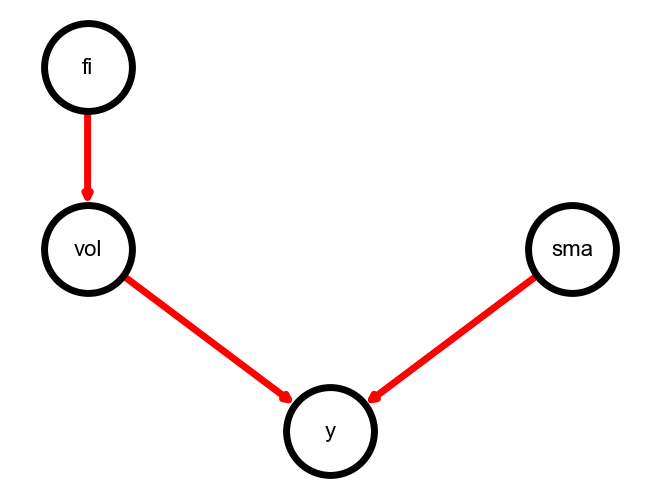

In [92]:
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

In [93]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Values:")
        print(potential)
        print('----------------')
        
        
# Use the above function to print marginal probabilities
print_probs()
join_tree.get_bbn_nodes()

Values:
1=0|0.65821
1=1|0.24197
1=2|0.09982
----------------
Values:
0=0|0.69970
0=1|0.25965
0=2|0.04065
----------------
Values:
2=0|0.88362
2=1|0.09702
2=2|0.01936
----------------
Values:
3=0|0.76581
3=2|0.23419
----------------


# Building the Evidence :

In [94]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder().with_node(join_tree.get_bbn_node_by_name(nod)).with_evidence(cat, val).build()
    join_tree.set_observation(ev)

In [95]:
#    y- >ca  | fi - pl | vol - ap | sma - fd 
p_fi_yes=join_tree.get_bbn_potential(fi).entries[0].value
p_fi_no=join_tree.get_bbn_potential(fi).entries[1].value

In [96]:
print(join_tree.get_bbn_potential(fi))

0=0|0.69970
0=1|0.25965
0=2|0.04065


In [97]:
p_sma_yes=join_tree.get_bbn_potential(sma).entries[0].value
p_sma_no=join_tree.get_bbn_potential(sma).entries[1].value

In [98]:
print(join_tree.get_bbn_potential(sma))

2=0|0.88362
2=1|0.09702
2=2|0.01936


# Probablity :

In [99]:
#p(avg packet/packet length)
evidence('eve1','fi',0,1.0)
p_vol_fi_yes=join_tree.get_bbn_potential(vol).entries[0].value
join_tree.unobserve([fi])

#p(avg packet/~packet length)                                                 
evidence('eve1','fi',1,1.0)
p_vol_fi_no=join_tree.get_bbn_potential(vol).entries[1].value
join_tree.unobserve([fi])


In [100]:
p_vol_yes=p_vol_fi_yes * p_fi_yes + p_vol_fi_no * p_fi_no  #vol - app || fi - pl    || sm - fd 
p_vol_no=1-p_vol_yes
#    y- >ca  | fi - pl | vol - ap | sma - fd 

In [101]:
evidence('eve1','vol',0,1.0)
evidence('eve2','sma',0,1.0)
p_vol_yes_sma_yes=join_tree.get_bbn_potential(y).entries[1].value
join_tree.unobserve([vol,sma])

#Class p(ca/ap,~fd)
evidence('eve1','vol',0,1.0)
evidence('eve2','sma',1,1.0)
p_vol_yes_sma_no=join_tree.get_bbn_potential(y).entries[1].value
join_tree.unobserve([vol,sma])

#Class p(ca/~ap,fd)
evidence('eve1','vol',1,1.0)
evidence('eve2','sma',0,1.0)
p_vol_no_sma_yes=join_tree.get_bbn_potential(y).entries[0].value
join_tree.unobserve([vol,sma])

#Class p(ca/~ap,~fd)
evidence('eve1','vol',1,1.0)
evidence('eve2','sma',1,1.0)
p_vol_no_sma_no=join_tree.get_bbn_potential(y).entries[0].value
join_tree.unobserve([vol,sma])

In [102]:
#    y- >ca  | fi - pl | vol - ap | sma - fd 

p_y_yes=p_vol_yes_sma_yes*p_vol_yes*p_sma_yes +\
p_vol_yes_sma_no*p_vol_yes*p_sma_no + \
p_vol_no_sma_yes*p_vol_no*p_sma_yes + \
p_vol_no_sma_no*p_vol_no*p_sma_no

p_y_no=1-p_y_yes
p_y_yes

0.6216338000246387

In [103]:
p_y_no

0.37836619997536125

# Prediction :

In [104]:
if p_y_yes > p_y_no :
    print("The Prediction is upwards...")
else :
    print("The prediction is Downwards..")

The Prediction is upwards...


# Result :

    Thus,Bayesian Belief Network is verfied by given relation and result is predicted.